In [1]:
import re 
import os
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf

Ha = 27.211369 





file_dir = 'D:\\DataSet\\project_material\\result\\'

In [2]:
f = open('atom.txt','r',encoding='UTF-8')
atom_matter = {}
for line in f.readlines():
    if(len(line)>0):
#     print(line.split()[0])
        number = re.findall(r'\d+\.?\d+?',line.split()[1])
        atom_syb = line.split()[0]
        atom_matter[atom_syb] = float(number[0])

    
#建立原子质量表，用于取代原子符号


pass


In [3]:
print(atom_matter)
print(type(atom_matter['He']))

{'H': 1.0, 'He': 4.0, 'Li': 6.9, 'Be': 9.0, 'B': 10.8, 'C': 12.0, 'N': 14.0, 'O': 15.9, 'F': 18.9, 'Ne': 20.1, 'Na': 22.9, 'Mg': 24.3, 'Al': 26.9, 'Si': 28.0, 'P': 30.9, 'S': 32.0, 'Cl': 35.4, 'Ar': 39.9, 'K': 39.0, 'Ca': 40.0, 'Sc': 44.9, 'Ti': 47.8, 'V': 50.9, 'Cr': 51.9, 'Mn': 54.9, 'Fe': 55.8, 'Co': 58.9, 'Ni': 58.6, 'Cu': 63.5, 'Zn': 65.3, 'Ga': 69.7, 'Ge': 72.6, 'As': 74.9, 'Se': 78.9, 'Br': 79.9, 'Kr': 83.7, 'Rb': 85.4, 'Sr': 87.6, 'Y': 88.9, 'Zr': 91.2, 'Nb': 92.9, 'Mo': 95.9, 'Tc': 98.9, 'Ru': 101.0, 'Rh': 102.9, 'Pd': 106.4, 'Ag': 107.8, 'Cd': 112.4, 'In': 114.8, 'Sn': 118.7, 'Sb': 121.7, 'Te': 127.6, 'I': 126.9, 'Xe': 131.2, 'Cs': 132.9, 'Ba': 137.3, 'La': 138.9, 'Ce': 140.1, 'Pr': 140.9, 'Nd': 144.2, 'Pm': 144.9, 'Sm': 150.3, 'Eu': 151.9, 'Gd': 157.2, 'Tb': 158.9, 'Dy': 162.5, 'Ho': 164.9, 'Er': 167.2, 'Tm': 168.9, 'Yb': 173.0, 'Lu': 174.9, 'Hf': 178.4, 'Ta': 180.9, 'W': 183.8, 'Re': 186.2, 'Os': 190.2, 'Ir': 192.2, 'Pt': 195.0, 'Au': 196.9, 'Hg': 200.5, 'Tl': 204.3, 'Pb': 

In [4]:
def set_center_gravity(array):
    array = array.reshape(int(len(array)/4),4)
    for i in range(1,4):
        mean_center = np.mean(array[:,i])

        array[:,i] = array[:,i] - [mean_center] * len(array[:,i])
    arr = array.reshape(-1,)

    return arr

In [5]:
import scipy.linalg as linalg
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
#旋转矩阵 欧拉角
def rotate_mat(axis, radian):
    rot_matrix = linalg.expm(np.cross(np.eye(3), axis / linalg.norm(axis) * radian))
    return rot_matrix

In [6]:
energy_mat = []
coor_mat =[]
for file_name in os.listdir(file_dir):
#     print(file_name)
    f = open(file_dir + file_name)
    coor_sequence =[]
    for line in f.readlines():
        line = line.strip()
        if line in atom_matter:
            line = atom_matter[line]
        coor_sequence.append(float(line))
        energy = line
    energy_mat.append(np.array(float(energy)))
    
    coor_sequence.pop(len(coor_sequence)-1)
    coor_sequence = set_center_gravity(np.array(coor_sequence))

    coor_sequence =list(coor_sequence) + [0] *(1000-len(coor_sequence))
    coor_mat.append(np.array(coor_sequence))
    

energy_mat = energy_mat[0:5200]
coor_mat = coor_mat[0:5200]

In [7]:
# reshape
coor_mat_reshape = []
for item in coor_mat:
#     print(len(item))
    item = item.reshape(250,4)
    coor_mat_reshape.append(np.array(item))
print(energy_mat[0:10])
# print(len(coor_mat_reshape[0]))
# print(type(coor_mat_reshape[0]))
# coor_mat_reshape_array = np.array(coor_mat_reshape)
print(coor_mat_reshape[10])

[array(1765.188377), array(10432.589528), array(10432.589528), array(10509.13485), array(10509.134858), array(10509.139835), array(10509.13865), array(10509.139455), array(10509.139455), array(10507.843697)]
[[ 1.20000000e+01 -6.78494831e+00  2.85676190e+00 -2.83961518e+00]
 [ 1.20000000e+01 -5.23718629e+00  8.90469052e-01 -1.68942075e+00]
 [ 1.40000000e+01 -2.91426669e+00  1.89479608e+00 -1.04793194e+00]
 [ 1.20000000e+01 -2.98534229e+00  4.46809542e+00 -1.48292028e+00]
 [ 1.20000000e+01 -5.36577087e+00  5.11148586e+00 -2.70947259e+00]
 [ 1.40000000e+01 -1.27815333e+00  6.15631328e+00 -8.04820120e-01]
 [ 1.20000000e+01  9.44359993e-01  5.51052657e+00  1.30714760e-01]
 [ 1.40000000e+01  1.93595938e+00  3.10747292e+00  2.54038668e-01]
 [ 1.20000000e+01  4.40597209e+00  3.27830243e+00  1.05591112e+00]
 [ 1.20000000e+01  4.99862592e+00  5.90562635e+00  1.63353248e+00]
 [ 1.20000000e+01  2.81075340e+00  7.31647820e+00  1.04877265e+00]
 [ 1.40000000e+01  6.06842543e+00  1.41886439e+00  1.15

In [8]:

pure_coor_mat = [np.array(item)[:,1:4] for item in coor_mat_reshape]
pure_atom_matter = [np.array(item)[:,0:1] for item in coor_mat_reshape] * 12
print(pure_coor_mat[0])
print(pure_atom_matter[0])

[[ 8.42323361e+00 -1.31228433e+00  2.25560936e+00]
 [ 9.61959536e+00 -3.75107216e+00  2.41936761e+00]
 [ 8.13005727e+00 -5.91316650e+00  1.84931699e+00]
 [ 5.61027318e+00 -5.63179760e+00  1.19387446e+00]
 [ 4.37996978e+00 -3.23036341e+00  1.04712538e+00]
 [ 5.92160047e+00 -1.08136436e+00  1.59067505e+00]
 [ 4.31727298e+00 -7.82971938e+00  6.54708712e-01]
 [ 1.78660396e+00 -7.74744577e+00  3.49275529e-02]
 [ 4.74975197e-01 -5.39153088e+00 -1.04991343e-01]
 [ 1.80000733e+00 -3.09876827e+00  3.29307581e-01]
 [ 6.40822141e-01 -1.00561599e+01 -4.35235018e-01]
 [-1.96614083e+00 -1.01565494e+01 -1.07753273e+00]
 [-3.33662753e+00 -7.80673903e+00 -1.16813158e+00]
 [-2.15131707e+00 -5.53930720e+00 -7.10212771e-01]
 [ 9.82523673e-01 -3.33827193e-01 -4.52377581e+00]
 [-3.77192754e-02  6.88436649e-01 -2.09283500e+00]
 [ 4.54179200e-01 -6.15324669e-01  2.00345068e-01]
 [-1.39618781e+00  2.97036833e+00 -2.09078692e+00]
 [-2.31993383e+00  4.04494603e+00  1.79633750e-01]
 [-1.79728426e+00  2.73762973e+

In [9]:
coor_mat_rotate = []
energy_mat_rotate = energy_mat * 12
for rot_index in range(0,12):
    
    rot_mat = rotate_mat([0,0,1], rot_index * 3.1415/(12*180))
#     print(rot_mat)
    for i in range(len(coor_mat)):
        single = []
        for item in pure_coor_mat[i]:
            
            x1 = np.dot(rot_mat, item)
            single.append(x1)
        coor_mat_rotate.append(single)



In [10]:
print(len(coor_mat_rotate))      
print(len(energy_mat_rotate))
# print(len(coor_mat))
print(len(coor_mat_rotate[0]))      
print(len(pure_atom_matter[0]))


coor_mat_after_rotate = []
for i in range(len(pure_atom_matter)):
    temp = np.hstack((pure_atom_matter[i],coor_mat_rotate[i]))
    coor_mat_after_rotate.append(temp)



62400
62400
250
250


In [11]:
print(len(coor_mat_after_rotate))
print(len(energy_mat_rotate))
print(coor_mat_after_rotate[0])
#time to train!!!

# print(len(coor_mat[0]))
X = np.asarray(coor_mat_after_rotate)
Y = np.asarray(energy_mat_rotate)
# print(len(X[5]))
np.savetxt('energy_rotate.txt',energy_mat_rotate,fmt = '%s')
# np.savetxt('coordinate_rotate.txt',coor_mat_after_rotate,fmt = '%s')

62400
62400
[[ 1.20000000e+01  8.42323361e+00 -1.31228433e+00  2.25560936e+00]
 [ 1.20000000e+01  9.61959536e+00 -3.75107216e+00  2.41936761e+00]
 [ 1.20000000e+01  8.13005727e+00 -5.91316650e+00  1.84931699e+00]
 [ 1.20000000e+01  5.61027318e+00 -5.63179760e+00  1.19387446e+00]
 [ 1.20000000e+01  4.37996978e+00 -3.23036341e+00  1.04712538e+00]
 [ 1.20000000e+01  5.92160047e+00 -1.08136436e+00  1.59067505e+00]
 [ 1.59000000e+01  4.31727298e+00 -7.82971938e+00  6.54708712e-01]
 [ 1.20000000e+01  1.78660396e+00 -7.74744577e+00  3.49275529e-02]
 [ 1.20000000e+01  4.74975197e-01 -5.39153088e+00 -1.04991343e-01]
 [ 1.20000000e+01  1.80000733e+00 -3.09876827e+00  3.29307581e-01]
 [ 1.20000000e+01  6.40822141e-01 -1.00561599e+01 -4.35235018e-01]
 [ 1.20000000e+01 -1.96614083e+00 -1.01565494e+01 -1.07753273e+00]
 [ 1.20000000e+01 -3.33662753e+00 -7.80673903e+00 -1.16813158e+00]
 [ 1.20000000e+01 -2.15131707e+00 -5.53930720e+00 -7.10212771e-01]
 [ 1.20000000e+01  9.82523673e-01 -3.33827193e-01 

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05)


In [13]:
print(len(x_train))
print(len(x_test))


59280
3120


In [17]:
import tensorflow as tf
import numpy as np
from numba import cuda

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Input
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


CNN = tf.keras.models.Sequential()


# CNN.add(tf.keras.layers.Input(shape=(50,5,4)))
# specify a list of the number of filters for each convolutional layer
# you can try any number of convolutional layers with any number of filters in each
# Ex: for n_filters in [a,b,c,...] where a, b, c, etc. are ints
for n_filters in [256,128,64,32,16,4]:
    CNN.add(tf.keras.layers.Conv1D(n_filters, kernel_size=4, strides=1 ,activation='relu'))
    # add a layer to further reduce the dimensionality
    # Hint: this layer has no learned parameters of its own
    CNN.add(MaxPool1D(pool_size=4, strides=1))
# # fill in the layer needed between our 2d convolutional layers and the dense layer

# specify the number of nodes in the dense layer before the output
CNN.add(Flatten())
CNN.add(Dense(100,activation='relu'))
CNN.add(Dense(1, activation='linear'))
    


# model = tf.keras.Sequential() #layers [1,50,50,50,50,1]
# model.add(tf.keras.layers.Masking(mask_value=0))

# model.add(tf.keras.layers.LSTM(input_shape=(250,4),units=50,return_sequences=True,activation='relu'))


# model.add(tf.keras.layers.LSTM(input_shape=(None,1),units=50,return_sequences=True,activation='relu'))

# model.add(tf.keras.layers.LSTM(input_shape=(None,1),units=50,return_sequences=True,activation='relu'))

# model.add(tf.keras.layers.LSTM(50,return_sequences=False,activation='relu'))

# model.add(tf.keras.layers.Dense(units=1,activation='relu'))

# model.add(Activation("sigmoid"))


1 Physical GPUs, 1 Logical GPUs


In [18]:
# bigger = len(X[0])
# for i in range(0,len(X)):
#     if len(X[i])>= bigger:
#         bigger = len(X[i])
#         print(bigger)


In [19]:
CNN.compile(optimizer='adam',
              loss='MSE'
              )



In [20]:
# checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  period=10,
#                                                  verbose=1)


# earlystop_callback = EarlyStopping(
#   monitor='val_accuracy', min_delta=0.0001,
#   patience=1)

history = CNN.fit(x_train, y_train,
          epochs=1000,
          validation_data=(x_test,y_test),
#           callbacks=[cp_callback],
        )

Epoch 1/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 2952098.0000 - val_loss: 588253.6250
Epoch 2/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 570900.1250 - val_loss: 65780.4297
Epoch 3/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 347967.2188 - val_loss: 162283.5000
Epoch 4/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 289523.2500 - val_loss: 256404.1094
Epoch 5/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 342692.7500 - val_loss: 41296.2422
Epoch 6/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 287187.8750 - val_loss: 318384.0625
Epoch 7/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 248993.7500 - val_loss: 42865.3711
Epoch 8/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 308467.2188 - val_loss: 297269.6875
Epoch 9/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 105

1853/1853 [==============================] - 13s 7ms/step - loss: 30611.4102 - val_loss: 10881.3242
Epoch 73/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 40411.5117 - val_loss: 10311.6836
Epoch 74/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 30742.0508 - val_loss: 9583.3076
Epoch 75/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 41076.6719 - val_loss: 132161.2344
Epoch 76/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 35791.1094 - val_loss: 9617.6064
Epoch 77/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 30162.2793 - val_loss: 12670.8320
Epoch 78/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 47973.9648 - val_loss: 106381.6328
Epoch 79/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 46300.3164 - val_loss: 12241.0010
Epoch 80/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 39149.6445 - val_loss:

Epoch 144/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 25856.5527 - val_loss: 14221.5137
Epoch 145/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9876.5215 - val_loss: 26635.8438
Epoch 146/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 19790.1758 - val_loss: 42502.2578
Epoch 147/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 29770.5566 - val_loss: 6431.4590
Epoch 148/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 25331.6133 - val_loss: 5507.6899
Epoch 149/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 17272.0742 - val_loss: 6489.3979
Epoch 150/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 20344.1875 - val_loss: 4888.3252
Epoch 151/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 26192.1875 - val_loss: 21781.5684
Epoch 152/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 1553

1853/1853 [==============================] - 13s 7ms/step - loss: 21965.4609 - val_loss: 7310.9966
Epoch 216/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 12239.9990 - val_loss: 5567.4736
Epoch 217/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 16062.0107 - val_loss: 7209.4023
Epoch 218/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 15936.2998 - val_loss: 6588.8589
Epoch 219/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 22242.2891 - val_loss: 6002.1245
Epoch 220/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 17295.4395 - val_loss: 7925.9072
Epoch 221/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 16176.0215 - val_loss: 6716.0059
Epoch 222/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 16388.6504 - val_loss: 5237.2632
Epoch 223/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 15771.8584 - val_loss:

Epoch 287/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 14059.5615 - val_loss: 12810.3730
Epoch 288/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 12449.2979 - val_loss: 4550.0654
Epoch 289/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 17567.4512 - val_loss: 5451.6206
Epoch 290/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 12802.7900 - val_loss: 22282.5430
Epoch 291/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 15164.9297 - val_loss: 4558.2383
Epoch 292/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 12620.3281 - val_loss: 13633.2607
Epoch 293/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 22246.4727 - val_loss: 4540.0869
Epoch 294/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 14472.2568 - val_loss: 4350.2207
Epoch 295/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 1505

1853/1853 [==============================] - 14s 7ms/step - loss: 10360.8740 - val_loss: 5869.3345
Epoch 359/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 17404.7090 - val_loss: 6695.0557
Epoch 360/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 21063.2441 - val_loss: 21044.3379
Epoch 361/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8119.2544 - val_loss: 4713.9473
Epoch 362/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 10261.3604 - val_loss: 4816.0151
Epoch 363/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 15708.2754 - val_loss: 4334.2114
Epoch 364/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 11236.2520 - val_loss: 5938.0928
Epoch 365/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 15539.0898 - val_loss: 20410.1211
Epoch 366/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 11889.6680 - val_loss

Epoch 430/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 13584.5186 - val_loss: 6087.3564
Epoch 431/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 8854.4902 - val_loss: 6497.0518
Epoch 432/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 14215.4180 - val_loss: 4435.4302
Epoch 433/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 12336.4590 - val_loss: 10290.9932
Epoch 434/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 7090.1016 - val_loss: 7655.7085
Epoch 435/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 13127.6406 - val_loss: 15554.7002
Epoch 436/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 13569.9531 - val_loss: 29623.7773
Epoch 437/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 7769.4307 - val_loss: 13520.0576
Epoch 438/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 12782.

Epoch 502/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 7919.4248 - val_loss: 4430.2329
Epoch 503/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 11507.3369 - val_loss: 11143.0420
Epoch 504/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9700.0693 - val_loss: 4167.5200
Epoch 505/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 11596.5908 - val_loss: 13242.1191
Epoch 506/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8206.0869 - val_loss: 6062.8066
Epoch 507/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 55335.1133 - val_loss: 7228.0903
Epoch 508/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 5660.7939 - val_loss: 4582.5947
Epoch 509/1000
1853/1853 [==============================] - 12s 7ms/step - loss: 9571.8408 - val_loss: 3944.3669
Epoch 510/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9588.0029 

Epoch 574/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9335.1650 - val_loss: 7492.9536
Epoch 575/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9986.6816 - val_loss: 9523.6133
Epoch 576/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9758.2334 - val_loss: 6047.3491
Epoch 577/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 10069.0479 - val_loss: 8179.8569
Epoch 578/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 10878.2891 - val_loss: 4829.0352
Epoch 579/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8620.1260 - val_loss: 30158.1172
Epoch 580/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8704.0664 - val_loss: 6710.5200
Epoch 581/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 11340.2168 - val_loss: 5310.8022
Epoch 582/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 10144.2324 

1853/1853 [==============================] - 13s 7ms/step - loss: 6378.6279 - val_loss: 4905.1997
Epoch 647/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 9030.9639 - val_loss: 4422.5806
Epoch 648/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8582.2168 - val_loss: 7186.9775
Epoch 649/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 10037.9297 - val_loss: 6758.2588
Epoch 650/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 9116.8428 - val_loss: 4883.9780
Epoch 651/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 11054.1768 - val_loss: 7959.7627
Epoch 652/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 8150.4976 - val_loss: 12676.7051
Epoch 653/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 10795.3643 - val_loss: 16279.6729
Epoch 654/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 7581.7422 - val_loss: 823

1853/1853 [==============================] - 13s 7ms/step - loss: 14866.8584 - val_loss: 6856.2236
Epoch 719/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 13216.8428 - val_loss: 5351.5630
Epoch 720/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8099.8218 - val_loss: 45613.9453
Epoch 721/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8716.7852 - val_loss: 5113.0962
Epoch 722/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8951.2021 - val_loss: 6099.5024
Epoch 723/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7836.9775 - val_loss: 11177.3535
Epoch 724/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9352.3701 - val_loss: 8285.8525
Epoch 725/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8708.3818 - val_loss: 7201.9136
Epoch 726/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8989.0020 - val_loss: 4500

1853/1853 [==============================] - 13s 7ms/step - loss: 8616.0430 - val_loss: 7911.4287
Epoch 791/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9386.1445 - val_loss: 11060.9668
Epoch 792/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 14504.8096 - val_loss: 14960.6602
Epoch 793/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8322.7275 - val_loss: 10192.6797
Epoch 794/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7952.4165 - val_loss: 5191.9248
Epoch 795/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7371.0273 - val_loss: 13778.5068
Epoch 796/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9619.3594 - val_loss: 4459.1001
Epoch 797/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7619.9233 - val_loss: 7453.6172
Epoch 798/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8924.0898 - val_loss: 629

1853/1853 [==============================] - 14s 7ms/step - loss: 7297.4082 - val_loss: 5717.7847
Epoch 863/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9547.3271 - val_loss: 5511.9326
Epoch 864/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8625.3848 - val_loss: 22446.8613
Epoch 865/1000
1853/1853 [==============================] - 14s 7ms/step - loss: 10396.3447 - val_loss: 4057.9270
Epoch 866/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 6381.2891 - val_loss: 7988.3213
Epoch 867/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 6327.9219 - val_loss: 5758.2891
Epoch 868/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7892.0713 - val_loss: 5599.1919
Epoch 869/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 9039.9258 - val_loss: 4316.7334
Epoch 870/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 6944.9800 - val_loss: 4694.3

1853/1853 [==============================] - 13s 7ms/step - loss: 8495.8857 - val_loss: 7986.8730
Epoch 935/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8351.8633 - val_loss: 4275.6060
Epoch 936/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 6621.2783 - val_loss: 10752.0215
Epoch 937/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7425.5532 - val_loss: 4298.5352
Epoch 938/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7273.0312 - val_loss: 4877.8989
Epoch 939/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8269.2520 - val_loss: 4089.7502
Epoch 940/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 7227.4722 - val_loss: 14125.9658
Epoch 941/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8436.9883 - val_loss: 4362.3521
Epoch 942/1000
1853/1853 [==============================] - 13s 7ms/step - loss: 8109.7070 - val_loss: 5144.2

In [21]:
# latest = tf.train.latest_checkpoint(checkpoint_dir)
# print(latest)
CNN.evaluate(x_test,y_test,verbose=2)
# new_model = tf.keras.models.load_model('model//ann_2.h5')
# new_model.evaluate(x_test,y_test,verbose=2)


98/98 - 0s - loss: 5147.9023


5147.90234375

In [22]:
# print(bigger)
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 247, 256)          4352      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 244, 256)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 241, 128)          131200    
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 238, 128)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 235, 64)           32832     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 232, 64)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 229, 32)          

680.9813
3120


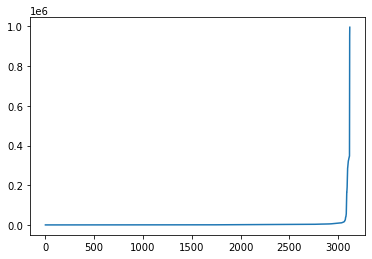

In [29]:

np.set_printoptions(threshold=np.inf)
# # model = new_model
# result = new_model.predict(x_test)
result = CNN.predict(x_test)
loss_mat = [(result[i]-y_test[i])**2 for i in range(0,len(x_test))]
# KL_mat =[(result[i]-y_test) for i in range|(0,len(x_test))]
# print(np.sort(loss_mat,axis = 0))
score = np.mean(np.sort(loss_mat,axis=0)[0:int(0.9 * len(loss_mat))])
# print('the biggest loss is ',big)
# print("the local of it ", local)
print(score)
plt.plot(np.sort(loss_mat,axis=0))
#now we are using a new method to do the thing:
print(len(loss_mat))

In [30]:
# from keras.utils import plot_model
# import pydot

In [31]:
# plot_model(model,to_file = 'model.png')

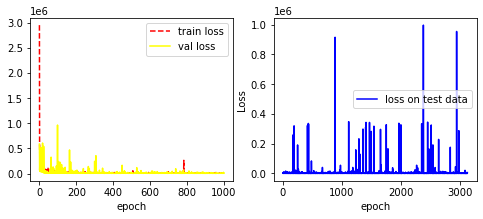

In [83]:
hist = history.history
# print(type(history))
# print(history.history)
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(hist['loss'], c='red', ls='--', label='train loss')

ax[0].plot(hist['val_loss'], c='yellow', label='val loss')
plt.ylabel("Loss")

ax[1].plot(loss_mat,c= 'blue',label='loss on test data')

plt.ylabel("Loss")

for axis in ax:
    axis.set_xlabel('epoch')
    axis.legend()

In [36]:
print(np.sort(CNN.predict(x_test),axis=0))

[[7.55769501e+01]
 [8.49010468e+01]
 [9.65779266e+01]
 [1.26673386e+02]
 [1.30889328e+02]
 [1.31590012e+02]
 [1.32612228e+02]
 [1.35120041e+02]
 [1.35892502e+02]
 [1.36104660e+02]
 [1.36235153e+02]
 [1.36674362e+02]
 [1.37543991e+02]
 [1.73906662e+02]
 [1.73987595e+02]
 [1.85654343e+02]
 [1.85812912e+02]
 [1.85938400e+02]
 [1.86835129e+02]
 [1.95418381e+02]
 [1.95688156e+02]
 [1.97132736e+02]
 [1.97132736e+02]
 [1.97167526e+02]
 [2.42888718e+02]
 [2.46222336e+02]
 [2.46462936e+02]
 [2.65256622e+02]
 [2.65268097e+02]
 [3.44752350e+02]
 [3.48630768e+02]
 [3.68181427e+02]
 [4.43211456e+02]
 [4.60873810e+02]
 [5.17956116e+02]
 [5.28219299e+02]
 [5.33088989e+02]
 [5.42665710e+02]
 [5.51498230e+02]
 [5.51785828e+02]
 [5.52620056e+02]
 [6.88190369e+02]
 [7.21308167e+02]
 [7.49484192e+02]
 [7.57943787e+02]
 [7.62296204e+02]
 [7.62325989e+02]
 [7.66001770e+02]
 [1.00566412e+03]
 [1.20104858e+03]
 [1.21049963e+03]
 [1.21271033e+03]
 [1.21362036e+03]
 [1.21430957e+03]
 [1.21535046e+03]
 [1.233764

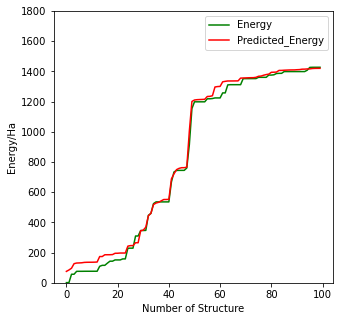

In [78]:
plt.figure(num=3, figsize=(5, 5))
plt.plot(np.sort(y_test)[0:100],color = 'green', label='Energy')
plt.plot(np.sort(CNN.predict(x_test),axis=0)[0:100],color ='red', label='Predicted_Energy')
plt.ylim((0, 1800))
plt.xlabel('Number of Structure')
plt.ylabel('Energy/Ha')
plt.legend()

CNN.save('model//cnn_trail_end_3.h5')
# model.save("D:\project_material\model")
# model.fit(train_images, 
#           train_labels,  
#           epochs=10,
#           validation_data=(test_images,test_labels),
#           callbacks=[cp_callback])  # 通过回调训练

In [39]:
# model.evaluate(X_test[0:20],Y_test[0:20],verbose = 2)
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

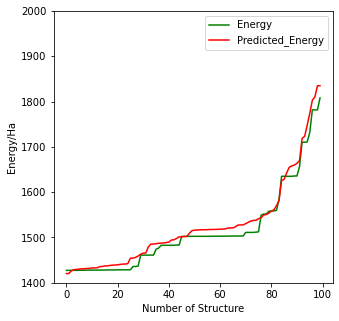

In [74]:
plt.figure(num=3, figsize=(5, 5))
plt.plot(np.sort(y_test)[100:200],color = 'green', label='Energy')
plt.plot(np.sort(CNN.predict(x_test),axis=0)[100:200],color ='red', label='Predicted_Energy')
plt.ylim((1400, 2000))
plt.xlabel('Number of Structure')
plt.ylabel('Energy/Ha')
plt.legend()


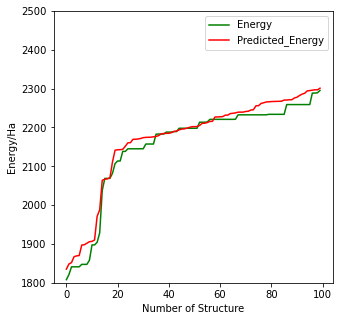

In [76]:
plt.figure(num=3, figsize=(5, 5))
plt.plot(np.sort(y_test)[200:300],color = 'green', label='Energy')
plt.ylim((1800, 2500))
plt.plot(np.sort(CNN.predict(x_test),axis=0)[200:300],color ='red', label='Predicted_Energy')
plt.xlabel('Number of Structure')
plt.ylabel('Energy/Ha')
plt.legend()


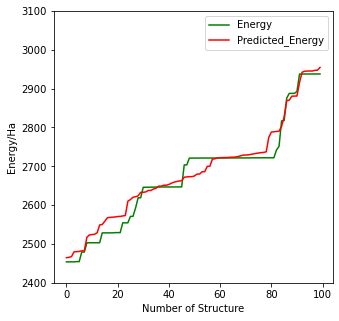

In [77]:
plt.figure(num=3, figsize=(5, 5))
plt.plot(np.sort(y_test)[400:500],color = 'green', label='Energy')
plt.plot(np.sort(CNN.predict(x_test),axis=0)[400:500],color ='red', label='Predicted_Energy')
plt.ylim((2400, 3100))
plt.xlabel('Number of Structure')
plt.ylabel('Energy/Ha')
plt.legend()
